In [1]:
# Import relevant modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
import pybird

Some aesthetic definitions for the plots

In [2]:
font = {'size': 16, 'family': 'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

Instantiate a Class object, set parameters and compute

In [3]:
M = Class()
M.set({'A_s': 2.215e-09,
       'n_s': 0.9619,
       'h': 0.68,
       'omega_b': 0.022032,
       'omega_cdm': 0.12038,
       'tau_reio': 0.0925,
       'N_ncdm': 1,
       'N_ur': 2.0328})

M.set({'output': 'mPk',
       'P_k_max_1/Mpc': 3.0,
       'z_max_pk': 1.0})

M.compute()

Get the linear power spectrum at redshift zpk, and plot it

In [4]:
zpk = 0.5

# k in h/Mpc
kk = np.logspace(-4, np.log10(3), 1000) 

# P(k) in (Mpc/h)**3
Pk = np.array([M.pk(k, zpk) for k in kk])

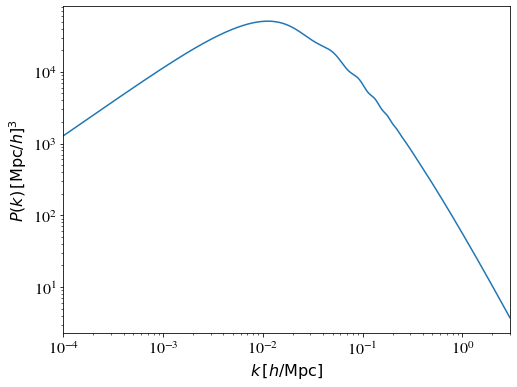

In [5]:
plt.figure()

plt.plot(kk, Pk, 'C0-')

plt.xscale('log')
plt.yscale('log')

plt.xlim(kk[0], kk[-1])

plt.xlabel(r'$k \, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \, [\mathrm{Mpc}/h]^3$')

plt.show()

Define a vector with the bias parameters, and redefine b2 and b4 as in the code

In [6]:
bval = np.array([2.3, 0.8, 0.2, 0.8, 0.4, -7., 0.])

b1 = bval[0]
b2 = (bval[1] + bval[3]) / np.sqrt(2.)
b4 = (bval[1] - bval[3]) / np.sqrt(2.)
bs = [b1, b2, bval[2], b4, bval[4], bval[5], bval[6]]

Define an object of the class Common, with settings for the pybird objects

In [7]:
common = pybird.Common(optiresum = True)

Instantiate the class that calculates the nonlinear power spectrum.
It will load precomputed FFTLog matrices if they are in the folder, otherwise it will compute new ones.

In [8]:
import time

In [9]:
time1 = time.time()
nonlinear = pybird.NonLinear(load=True, save=True, co=common)
print(time.time() - time1)

0.31087303161621094


Instantiate the class that calculates the resummed power spectrum

In [10]:
resum = pybird.Resum(co=common)

Finally, instantiate the class that applies the Alcock-Paczynski (AP) effect, the window function, and the fiber collisions

In [11]:
xdata = np.linspace(0.01, 0.3, 30)
Om_AP = 0.31
z_AP = zpk

In [12]:
projection = pybird.Projection(xdata, Om_AP, z_AP)

Now instantiate the main class

In [13]:
DA = M.angular_distance(zpk) * M.Hubble(0.)
H = M.Hubble(zpk) / M.Hubble(0.)
f = M.scale_independent_growth_factor_f(zpk)

bird = pybird.Bird(kk, Pk, f, DA, H, zpk, which='full')

Call the routine to get the correlation function, and compute it in the bird object

In [14]:
time1 = time.time()
nonlinear.PsCf(bird)
bird.setPsCfl()
print(time.time()-time1)

AttributeError: 'Bird' object has no attribute 'Ploopl'

Compute the resummed power spectrum

In [15]:
time1 = time.time()
resum.Ps(bird)
print(time.time() - time1)

0.6017911434173584


Finally, set the AP effect and/or the window function

In [16]:
projection.AP(bird=bird)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

The following gives the full galaxy power spectrum, given the biases

In [39]:
bird.setreducePslb(bs)